In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
font_path = "data/NanumGothic.ttf"

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt
from wordcloud import WordCloud

In [ ]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import json
from collections import Counter

In [95]:
data = pd.read_csv('data/t_data_2023_2022.csv') 
#-- 본인 환경에 맞게 설치 경로 변경할 것
df_data = pd.DataFrame(data)
df_data.head(10)

,연수명,내용,별점,등록일,분류
0,같이 읽고 함께 나누는 독서수업방법,아이를 키우며 그림책과 동화책에 관심을 갖게 되었다.\n감동적이고 재미있는 책들을 ...,5,2023.07.28,긍정
1,강의의 품격,비추천합니다. 새로울 것 없는 내용과 화질 안 좋은 것은 참겠는데 음향은 정말 괴로...,3,2023.07.27,부정
2,신병주 교수의 왕으로 산다는 것,조선왕들의 역사를 통하여 현재를 묻는 거울이 된다.\n균형있는 강의 내용과 치우침이...,5,2023.07.27,긍정
3,15시간 메디컬 콘서트 1탄 - 현대인의 만성 질병,잘못 알고 있던 의학 상식들을 제대로 알 수 있어 좋았어요,5,2023.07.27,긍정
4,정훈쌤의 뚝딱 칼림바,칼림바 연수에서 칼림바와 악보를 선물로 받았습니다. 학생들이 음악 강사와 칼림바 수...,5,2023.07.26,긍정
5,30시간 지리와 함께하는 인문학 티타임,감사합니다.,5,2023.07.26,긍정
6,메이슨의 패턴잉글리쉬,"그동안 영어 연수 많이 받았었는데, 1강부터 30강까지 이렇게 열심히 들은 연수는 ...",5,2023.07.26,긍정
7,7인의 전문의와 함께하는 메디컬 콘서트,막연한 의학 용어와 지식을 제대로 알게 되는 기회가 되었습니다. 들은 내용을 토대로...,5,2023.07.25,긍정
8,어린이 생활세계로 열어가는 사회 교과서 이야기 (5~6학년),5학년을 여러해 담임하고 있습니다. 같은 학년을 반복해 하다보니 사회 과목은 아주 ...,5,2023.07.24,긍정
9,한 번에 끝내는 법정연수 1,매년 들어야 하는 법정연수이지만 조금이라도 더 귀에 쏙쏙 들어오게 해 주는 강의가 ...,5,2023.07.24,긍정


In [96]:
## 리뷰 데이터 탐색

In [97]:
df_data.info()

# 코멘트가 없는 리뷰 데이터(NaN) 제거
df_reviews = df_data.dropna()

# 중복 리뷰 제거
df_reviews = df_reviews.drop_duplicates(['내용'])

df_reviews.info()
df_reviews.head(10)

# 연수명 리스트 확인
연수명_list = df_reviews.연수명.unique()

print('연수명_list =', len(연수명_list))
print(연수명_list[:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연수명     1410 non-null   object
 1   내용      1410 non-null   object
 2   별점      1410 non-null   int64 
 3   등록일     1410 non-null   object
 4   분류      1410 non-null   object
dtypes: int64(1), object(4)
memory usage: 55.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 1409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연수명     1365 non-null   object
 1   내용      1365 non-null   object
 2   별점      1365 non-null   int64 
 3   등록일     1365 non-null   object
 4   분류      1365 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.0+ KB
연수명_list = 161
['같이 읽고 함께 나누는 독서수업방법' '강의의 품격' '신병주 교수의 왕으로 산다는 것'
 '15시간 메디컬 콘서트 1탄 - 현대인의 만성 질병' '정훈쌤의 뚝딱 칼림바' '30시간 지리와 함께하는 인문학 티타임'
 '메이슨의 패턴잉글리쉬' '7인의 전문의와 함께하는 메디컬 콘서트' '어린이 생

In [98]:
df_reviews = df_reviews['내용']

In [99]:
df_reviews = df_reviews.sample(1000) # 1000개 샘플링 

In [100]:
df_reviews.reset_index(drop=True, inplace=True)

In [101]:
df_reviews

0                                    도움이 된 연수입니다. 감사합니다.
1      신나는 과학 수다와 함께하는 과학 이야기 가볍지만 깊은 내용으로 연수를 들으면서 많...
2      매년 하면서도 새학기, 새학년이 되면 학급운영에 대한 고민이 앞서고 막막합니다. 신...
3               미술치료에 관심이 많았는데 상세하게 설명하여 활용도가 높은 연수였습니다.
4      요즘 많은 선생님들께서 칼림바를 수업에 많이 적용하고 계셔서 저도 궁금하던 차에 연...
                             ...                        
995               워낙 오랜만에 듣는 학자들 이름이 많고 강의식이라서 조금은 어려웠어요
996    연구 대회에 나가고 싶다는 막연한 생각은 있었는데 주제는 어떻게 잡아야 하는지, 보...
997    문학 속 지리 이야기를 들으며 장마와 불볕더위를 잠시 잊었네요.\n지리 뿐 아니라 ...
998    평소 캘리그래피에 관심이 있었는데 이번 연수를 통해 좋은 기회가 된 것 같습니다. ...
999           세계 속의 한국 문화의 우수성을 심도 있게 알 수 있는 유익한 연수였습니다.
Name: 내용, Length: 1000, dtype: object

In [102]:
df_reviews[0]+df_reviews[1]

'도움이 된 연수입니다. 감사합니다.신나는 과학 수다와 함께하는 과학 이야기 가볍지만 깊은 내용으로 연수를 들으면서 많은 도움을 받았습니다. 티셀파 연수 하나하나 다 좋네요 이런 강의 많이 부탁드려요'

In [103]:
reviews = ""

In [104]:
# 1000개의 리뷰 문장을 하나의 리뷰로 합치기 

for i in range(len(df_reviews)):
    reviews += df_reviews[i]

In [105]:
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [106]:
# 한글과 띄어쓰기를 제외한 문자 삭제 적용

reviews = apply_regular_expression(reviews)
reviews

'도움이 된 연수입니다 감사합니다신나는 과학 수다와 함께하는 과학 이야기 가볍지만 깊은 내용으로 연수를 들으면서 많은 도움을 받았습니다 티셀파 연수 하나하나 다 좋네요 이런 강의 많이 부탁드려요매년 하면서도 새학기 새학년이 되면 학급운영에 대한 고민이 앞서고 막막합니다 신규타이틀은 벗은지 오래지만 다시 배우는 마음가짐으로 열심히 수강했습니다 내년에 활용해보겠습니다 정말 감사합니다미술치료에 관심이 많았는데 상세하게 설명하여 활용도가 높은 연수였습니다요즘 많은 선생님들께서 칼림바를 수업에 많이 적용하고 계셔서 저도 궁금하던 차에 연수를 듣게 되었습니다 새롭게 악기를 배우는 즐거움을 아이들에게도 전파하겠습니다 감사합니다얕게 알아 걱정이었던 수학 주제에 대해 이론과 지도방법을 찬찬히 알려주셔 많이 배울 수 있었습니다또한 실제 수업에서 활용할 수 있는 스토리텔링 애니메이션을 제시해주셔서 도움이 됩니다거기다 스토리텔링 이용한 실제 수업 사례 장면까지 보여주시니 이해가 바로 갔습니다이론과 적용을 모두 갖춘 스토리텔링 활용 수학 수업 연수 참 좋았습니다 감사합니다좋은 연수입니다핵심단어 개를 가지고 여기저기 다 활용하여 완성하는 영어회화 수업입니다 강추입니다더 깊이 독립운동의 현장을 더욱 자세히 알게 되는 값진 경험이었습니다연수 신청을 해 놓고 월이라 너무 바빠 차일피일 미루다연수원에서 게속 보내는 메세지를 보고 급하게 들은 연수지만 힐링의 시간이었습니다칼림바를 처음 접하기에 멜로디는 쉽게 따라갔는데 많은 연습 없이 진도를 나가려니 머리로는 이해되는데 손가락이 따라가지 않아 약간 마음이 힘들어졌지만 악기 소리가 너무 맑아 계속 들었습니다방학 때 시간을 내어 충분히 연습하면서 복습을 해볼 생각입니다히라가나부터 시작해서 일본어를 처음 접하는 사람도 쉽게 접근할 수 있는 연수여서 좋아요미술 수업이 자신없는 저에게는 본 연수가 그야말로 맞춤형 연수입니다 오로지 교사용 지도서에 의존해서 수업을 하고 있어서 뭔가 변화가 필요해서 선택한 연수입니다 결론은 탁월한 선택이었다입니다 우선 각 

In [107]:
# 명사 형태소 추출 
okt = Okt()
nouns = okt.nouns(apply_regular_expression(reviews))
nouns

['도움',
 '연수',
 '과학',
 '수다',
 '과학',
 '이야기',
 '내용',
 '연수',
 '도움',
 '티셀파',
 '연수',
 '하나',
 '하나',
 '강의',
 '매년',
 '학기',
 '학년',
 '학급',
 '운영',
 '대한',
 '고민',
 '신규',
 '타이틀',
 '래지',
 '다시',
 '마음가짐',
 '수강',
 '내년',
 '활용',
 '정말',
 '미술',
 '치료',
 '관심',
 '상세',
 '설명',
 '활',
 '용도',
 '연수',
 '요즘',
 '선생님',
 '칼림',
 '수업',
 '적용',
 '저',
 '차',
 '연수',
 '악기',
 '즐거움',
 '아이',
 '전파',
 '알',
 '걱정',
 '수학',
 '주제',
 '대해',
 '이론',
 '지도',
 '방법',
 '수',
 '또한',
 '실제',
 '수업',
 '활용',
 '수',
 '스토리텔링',
 '애니메이션',
 '제시',
 '도움',
 '거기',
 '스토리텔링',
 '이용',
 '실제',
 '수업',
 '사례',
 '장면',
 '이해',
 '바로',
 '이론',
 '적용',
 '모두',
 '스토리텔링',
 '활용',
 '수학',
 '수업',
 '연수',
 '연수',
 '핵심',
 '단어',
 '개',
 '가지',
 '여기저기',
 '활용',
 '완성',
 '영어',
 '회화',
 '수업',
 '강추',
 '더',
 '깊이',
 '독립운동',
 '현장',
 '더욱',
 '알',
 '경험',
 '연수',
 '신청',
 '해',
 '월',
 '차일피일',
 '수원',
 '게속',
 '메세지',
 '보고',
 '연수',
 '힐링',
 '시간',
 '칼림',
 '처음',
 '접',
 '멜로디',
 '연습',
 '진도',
 '머리',
 '이해',
 '손가락',
 '약간',
 '마음',
 '악기',
 '소리',
 '계속',
 '방학',
 '때',
 '시간',
 '연습',
 '복습',
 '생각',
 '히라가나',
 '시작',
 '일본어',
 '처음',
 '

In [108]:
# 명사 형태소 개수 확인 

counter = Counter(nouns)
counter

Counter({'도움': 238,
         '연수': 1077,
         '과학': 166,
         '수다': 2,
         '이야기': 96,
         '내용': 191,
         '티셀파': 44,
         '하나': 58,
         '강의': 232,
         '매년': 12,
         '학기': 51,
         '학년': 52,
         '학급': 55,
         '운영': 30,
         '대한': 102,
         '고민': 69,
         '신규': 6,
         '타이틀': 2,
         '래지': 1,
         '다시': 78,
         '마음가짐': 4,
         '수강': 40,
         '내년': 17,
         '활용': 155,
         '정말': 116,
         '미술': 60,
         '치료': 12,
         '관심': 54,
         '상세': 8,
         '설명': 121,
         '활': 3,
         '용도': 3,
         '요즘': 24,
         '선생님': 185,
         '칼림': 49,
         '수업': 379,
         '적용': 65,
         '저': 97,
         '차': 8,
         '악기': 80,
         '즐거움': 13,
         '아이': 238,
         '전파': 2,
         '알': 189,
         '걱정': 12,
         '수학': 17,
         '주제': 27,
         '대해': 124,
         '이론': 22,
         '지도': 91,
         '방법': 112,
         '수': 676,
   

In [126]:
available_word = []

In [127]:
# 한글자 명사 제거 

for i in nouns:
    if len(i) > 1:
        available_word.append(i)

In [111]:
# 불용어 삭제
# 불용어 사전 불러오기 (https://www.ranks.nl/)

stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

In [277]:
# 이외에 의미 없는 단어를 불용어에 추가 

tsherpa_stopwords = ['연수', '수업', '생각', '강의', '시간', '학생', '선생님', '내용', '활용', '정말, 
                    '과학', '영어', '교사', '활동', '티셀파', '이야기', '아이', '대해', '통해', '대한', 
                     '부분', '천재', '해법', '사회']

In [192]:
for word in tsherpa_stopwords:
    stopwords.append(word)

In [193]:
clean_words = [] 

In [194]:
for i in available_word:
    if i not in stopwords:
        clean_words.append(i)

In [201]:
clean_words

['도움',
 '수다',
 '도움',
 '하나',
 '하나',
 '매년',
 '학기',
 '학년',
 '학급',
 '운영',
 '고민',
 '신규',
 '타이틀',
 '래지',
 '다시',
 '마음가짐',
 '수강',
 '내년',
 '정말',
 '미술',
 '치료',
 '관심',
 '상세',
 '설명',
 '용도',
 '요즘',
 '칼림',
 '적용',
 '악기',
 '즐거움',
 '전파',
 '걱정',
 '수학',
 '주제',
 '이론',
 '지도',
 '방법',
 '또한',
 '실제',
 '스토리텔링',
 '애니메이션',
 '제시',
 '도움',
 '거기',
 '스토리텔링',
 '이용',
 '실제',
 '사례',
 '장면',
 '이해',
 '바로',
 '이론',
 '적용',
 '모두',
 '스토리텔링',
 '수학',
 '핵심',
 '단어',
 '가지',
 '여기저기',
 '완성',
 '회화',
 '강추',
 '깊이',
 '독립운동',
 '현장',
 '더욱',
 '경험',
 '신청',
 '차일피일',
 '수원',
 '게속',
 '메세지',
 '보고',
 '힐링',
 '칼림',
 '처음',
 '멜로디',
 '연습',
 '진도',
 '머리',
 '이해',
 '손가락',
 '약간',
 '마음',
 '악기',
 '소리',
 '계속',
 '방학',
 '연습',
 '복습',
 '히라가나',
 '시작',
 '일본어',
 '처음',
 '사람',
 '접근',
 '미술',
 '자신',
 '맞춤',
 '사용',
 '도서',
 '의존',
 '뭔가',
 '변화',
 '선택',
 '결론',
 '선택',
 '우선',
 '별로',
 '레시피',
 '의도',
 '말씀',
 '주시',
 '의도',
 '파악',
 '듣기',
 '또한',
 '교과서',
 '기법',
 '아이디어',
 '이제',
 '정도',
 '미술',
 '욕심',
 '헤어스타일',
 '오로라',
 '그리기',
 '그리기',
 '만들기',
 '재미나',
 '설명',
 '안내',
 '도움',
 '교재',
 '걱정',
 '전자',
 

In [195]:
pos_word_count = Counter(clean_words)
pos_word_count

Counter({'도움': 238,
         '수다': 2,
         '하나': 58,
         '매년': 12,
         '학기': 51,
         '학년': 52,
         '학급': 55,
         '운영': 30,
         '고민': 69,
         '신규': 6,
         '타이틀': 2,
         '래지': 1,
         '다시': 78,
         '마음가짐': 4,
         '수강': 40,
         '내년': 17,
         '정말': 116,
         '미술': 60,
         '치료': 12,
         '관심': 54,
         '상세': 8,
         '설명': 121,
         '용도': 3,
         '요즘': 24,
         '칼림': 49,
         '적용': 65,
         '악기': 80,
         '즐거움': 13,
         '전파': 2,
         '걱정': 12,
         '수학': 17,
         '주제': 27,
         '이론': 22,
         '지도': 91,
         '방법': 112,
         '또한': 20,
         '실제': 52,
         '스토리텔링': 9,
         '애니메이션': 1,
         '제시': 12,
         '거기': 2,
         '이용': 21,
         '사례': 27,
         '장면': 2,
         '이해': 104,
         '바로': 41,
         '모두': 39,
         '핵심': 14,
         '단어': 6,
         '가지': 47,
         '여기저기': 3,
         '완성': 6,
         '

In [ ]:
pos_top_20 = {}

In [196]:
for word, counts in pos_word_count.most_common(max):
    pos_top_20[word] = counts
    print(f'{word} : {counts}')

도움 : 238
설명 : 121
정말 : 116
추천 : 113
방법 : 112
마음 : 109
이해 : 104
칼림바 : 104
우리 : 96
지도 : 91
그림 : 89
연습 : 84
악기 : 80
신청 : 80
교육 : 80
다시 : 78
역사 : 77
학교 : 75
연주 : 71
고민 : 69


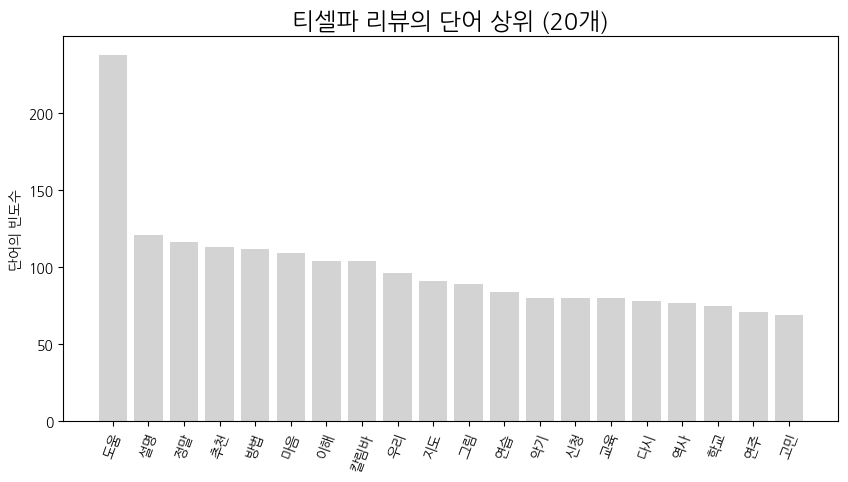

In [197]:
plt.figure(figsize=(10, 5))
plt.title('티셀파 리뷰의 단어 상위 (%d개)' % max, fontsize=17)    
plt.ylabel('단어의 빈도수')    
plt.xticks(rotation=70)
for key, value in pos_top_20.items():
    if key == '연수': continue
    plt.bar(key, value, color='lightgrey') 
plt.show()

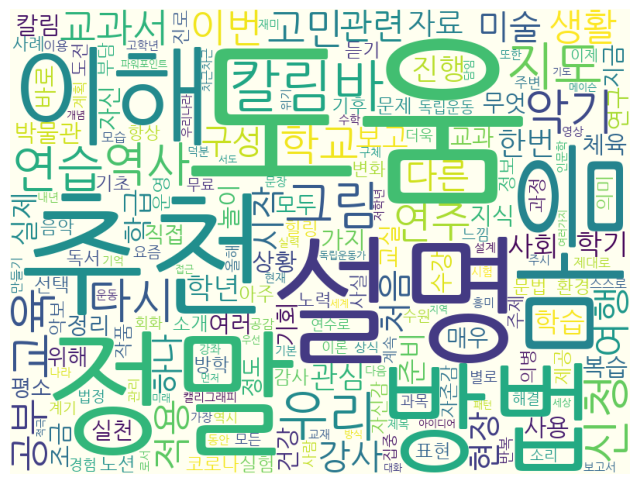

In [199]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(pos_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [200]:
with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f: 
    SentiWord_info = json.load(f)

sentiword_dic = pd.DataFrame(SentiWord_info)

In [217]:
# 유일값 저장
words_unique = list(set(clean_words))

In [268]:
df = pd.DataFrame(columns=("words", "sentiment"))

In [226]:
sentiword_dic

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14849,반신반의하다,반신반의,0
14850,신비롭다,신비,1
14851,아리송하다,아리송,-1
14852,알쏭하다,알쏭하,-1


In [265]:
sentiword_dic['polarity'].unique()

array(['1', '-1', '0', '-2', '2'], dtype=object)

In [233]:
len(words_unique)

2667

In [251]:
words_unique

['몰입',
 '치기',
 '다음해',
 '동요',
 '중심',
 '모로',
 '세심',
 '자유여행',
 '마지막',
 '아침',
 '전시',
 '예습',
 '정책',
 '조선',
 '조작',
 '드라마',
 '인종',
 '홍위병',
 '보람',
 '완성',
 '굳이',
 '의무감',
 '필요',
 '영역',
 '배경',
 '진행형',
 '파악',
 '생활기록부',
 '심각',
 '부자',
 '감성',
 '역할',
 '위안',
 '앞서',
 '역사',
 '좌절',
 '막상',
 '코로나',
 '경향',
 '다행',
 '해결',
 '산책',
 '전자',
 '아마',
 '민원',
 '철분',
 '에어컨',
 '용구성',
 '황성신문',
 '절제',
 '평생',
 '더위',
 '소양',
 '교담',
 '테스트',
 '평화',
 '궁터',
 '핑계',
 '일석이조',
 '학창',
 '희생',
 '플라톤',
 '수비',
 '계시',
 '자구',
 '모든',
 '깨알',
 '계획',
 '발령',
 '공생',
 '한나',
 '다방면',
 '변형',
 '그것',
 '사상',
 '역사관',
 '연결고리',
 '결합',
 '발성',
 '안과',
 '소통',
 '터전',
 '작성',
 '지원',
 '지류',
 '영어문법',
 '렌트카',
 '과연',
 '유시',
 '피아노',
 '휴직',
 '매년',
 '유방암',
 '아들',
 '보이',
 '구체',
 '잘못',
 '자아',
 '새해',
 '도입',
 '자의',
 '최고',
 '예제',
 '타분',
 '담화',
 '장면',
 '신경',
 '나이',
 '초점',
 '온전',
 '공작',
 '가득',
 '단편',
 '사의',
 '수강신청',
 '모처럼',
 '데넘',
 '동의',
 '이과',
 '만족',
 '찾기',
 '부가',
 '무심',
 '확장',
 '정말',
 '동포',
 '부리',
 '제외',
 '습관',
 '이상인',
 '수학',
 '다지',
 '매번',
 '법정',
 '불만',
 '연습장',
 '새로이',
 '화이트보

In [270]:
idx = 0                                             
 
for token in words_unique:
    sentiment = 0
    for i in range(0, len(sentiword_dic)):
        if sentiword_dic['word'][i] in token:
            sentiment = int(sentiword_dic['polarity'][i])
            df.loc[idx] = [token, sentiment]
            idx += 1

In [271]:
df

,words,sentiment
0,다음해,-2
1,정책,1
2,홍위병,-2
3,보람,1
4,완성,0
...,...,...
411,해설,-2
412,설정,1
413,후회,-2
414,능력,1


In [272]:
len(df['words'].unique())

381

In [273]:
n_df = df[df.sentiment < 0]

In [274]:
p_df = df[df.sentiment > 0]

In [275]:
n_df

,words,sentiment
0,다음해,-2
2,홍위병,-2
9,좌절,-2
10,해결,-2
13,평화,-2
...,...,...
406,학습만화,-2
407,문화유산,-2
411,해설,-2
413,후회,-2


In [276]:
p_df

,words,sentiment
1,정책,1
3,보람,1
5,완성,1
6,생활기록부,2
7,부자,1
...,...,...
405,수덕,2
408,재능,1
409,재정,1
412,설정,1
